<a href="https://colab.research.google.com/github/kellygaioni/ds_by_kelly/blob/main/dados_cetesb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução e Objetivo



Estudo a cerda dos dados sobre a Qualidado do Ar da Estação de São Bernardo do Campo - Centro fornecidos pela CETESB. Os dados coletados foram extraídos do site: https://qualar.cetesb.sp.gov.br/qualar/home.do no período de 02/04/2014 até 02/04/2024.
O objetivo desse notbook é a análise exploratório dos dados e levantamento de *insights*.

Explicação dos dados: (Pendente)


*   MP2.5
*   NO
*   NO2
*   NOx
*   O3
*   PRESS
*   RADG
*   RADUV
*   TEMP
*   UR
*   VV
*   CO
*   DV
*   DVG













# Importação de Bibliotecas

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importação da base extraída do site da Cetesb

In [ ]:
df = pd.read_excel('Dados Cetesb Completo.xlsx')

In [ ]:
df.head()

,Data,Hora,MP2.5,NO,NO2,NOx,O3,PRESS,RADG,RADUV,TEMP,UR,VV,CO,DV,DVG
0,2014-04-02,01:00:00,0,0,0,NaN,36.0,926.4,0.0,0.0,20.9,89.0,NaN,0.6,0,0
1,2014-04-02,02:00:00,0,0,19,10.0,30.0,926.1,0.0,0.0,20.9,90.0,NaN,0.6,0,0
2,2014-04-02,03:00:00,0,0,19,10.0,22.0,925.7,0.0,0.0,20.4,92.0,NaN,0.0,0,0
3,2014-04-02,04:00:00,0,0,18,10.0,18.0,925.4,0.0,0.0,20.1,93.0,NaN,0.6,0,0
4,2014-04-02,05:00:00,0,1,19,11.0,20.0,925.3,0.0,0.0,20.2,93.0,NaN,0.4,0,0


In [ ]:
df.describe()

,Data,MP2.5,NO,NO2,NOx,O3,PRESS,RADG,RADUV,TEMP,UR,VV,CO,DV,DVG
count,87696,87696.000000,87696.000000,87696.000000,77907.000000,82012.000000,84824.000000,85806.000000,85809.000000,39149.000000,40174.000000,85683.000000,87696.000000,87696.000000,87696.000000
mean,2019-04-02 12:00:00,14.023194,5.655127,24.032978,19.568126,44.829135,926.143883,163.626728,5.358972,20.145197,78.029273,1.754286,0.442586,205.793138,174.891797
min,2014-04-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,912.900000,0.000000,0.000000,5.100000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-10-01 00:00:00,5.000000,0.000000,10.000000,8.000000,24.000000,923.600000,0.000000,0.000000,16.700000,68.000000,1.200000,0.300000,122.000000,120.000000
50%,2019-04-02 12:00:00,11.000000,1.000000,19.000000,13.000000,39.000000,926.000000,5.000000,0.000000,19.800000,84.000000,1.700000,0.400000,134.000000,133.000000
75%,2021-10-02 00:00:00,20.000000,4.000000,32.000000,22.000000,58.000000,928.500000,243.000000,9.000000,23.000000,91.000000,2.300000,0.500000,292.000000,286.000000
max,2024-04-02 00:00:00,201.000000,401.000000,213.000000,390.000000,338.000000,939.100000,1143.000000,44.000000,37.900000,100.000000,6.300000,6.100000,888.000000,360.000000
std,NaN,12.571520,16.567368,20.836726,22.120732,32.868029,3.691739,256.524856,8.113435,4.646209,17.434133,0.801397,0.384803,147.522970,93.322099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87696 entries, 0 to 87695
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    87696 non-null  datetime64[ns]
 1   Hora    87696 non-null  object        
 2   MP2.5   87696 non-null  int64         
 3   NO      87696 non-null  int64         
 4   NO2     87696 non-null  int64         
 5   NOx     77907 non-null  float64       
 6   O3      82012 non-null  float64       
 7   PRESS   84824 non-null  float64       
 8   RADG    85806 non-null  float64       
 9   RADUV   85809 non-null  float64       
 10  TEMP    39149 non-null  float64       
 11  UR      40174 non-null  float64       
 12  VV      85683 non-null  float64       
 13  CO      87696 non-null  float64       
 14  DV      87696 non-null  int64         
 15  DVG     87696 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(5), object(1)
memory usage: 10.7+ MB


# Função para classificar a qualidade do ar

In [ ]:
df.columns

Index(['Data', 'Hora', 'MP2.5', 'NO', 'NO2', 'NOx', 'O3', 'PRESS', 'RADG',
       'RADUV', 'TEMP', 'UR', 'VV', 'CO', 'DV', 'DVG', 'Ano', 'qualidade_ar'],
      dtype='object')

In [ ]:
def classificar_qualidade_ar(row):
    mp25 = row['MP2.5']
    no2 = row['NO2']
    o3 = row['O3']
    co = row['CO']

    if (mp25 <= 25) and (no2 <= 200) and (o3 <= 100) and (co <= 9):
        return 'N1 – Boa'
    elif (25 < mp25 <= 50) or (200 < no2 <= 240) or (100 < o3 <= 130) or (9 < co <= 11):
        return 'N2 – Moderada'
    elif (50 < mp25 <= 75) or (240 < no2 <= 320) or (130 < o3 <= 160) or (11 < co <= 13):
        return 'N3 – Ruim'
    elif (75 < mp25 <= 125) or (320 < no2 <= 1130) or (160 < o3 <= 200) or (13 < co <= 15):
        return 'N4 – Muito Ruim'
    elif (mp25 > 125) or (no2 > 1130) or (o3 > 200) or (co > 15):
        return 'N5 – Péssima'
    else:
        return 'Indefinido'  # Caso alguma combinação de valores não encaixe nas categorias

# Aplicar a função ao DataFrame
df['qualidade_ar'] = df.apply(classificar_qualidade_ar, axis=1)

In [43]:
df.head()

,Data,Hora,MP2.5,NO,NO2,NOx,O3,PRESS,RADG,RADUV,TEMP,UR,VV,CO,DV,DVG,Ano,qualidade_ar,qualidade_ar_encoded
0,2014-04-02,01:00:00,0,0,0,NaN,36.0,926.4,0.0,0.0,20.9,89.0,NaN,0.6,0,0,2014,N1 – Boa,1.0
1,2014-04-02,02:00:00,0,0,19,10.0,30.0,926.1,0.0,0.0,20.9,90.0,NaN,0.6,0,0,2014,N1 – Boa,1.0
2,2014-04-02,03:00:00,0,0,19,10.0,22.0,925.7,0.0,0.0,20.4,92.0,NaN,0.0,0,0,2014,N1 – Boa,1.0
3,2014-04-02,04:00:00,0,0,18,10.0,18.0,925.4,0.0,0.0,20.1,93.0,NaN,0.6,0,0,2014,N1 – Boa,1.0
4,2014-04-02,05:00:00,0,1,19,11.0,20.0,925.3,0.0,0.0,20.2,93.0,NaN,0.4,0,0,2014,N1 – Boa,1.0


In [44]:
df.to_excel('Dados Cetesb Completo com Classificação.xlsx', index=False)

# Análise exploratória das variáveis

In [ ]:
# Validação da Coluna qualidade_ar

In [ ]:
# Verificar valores nulos na coluna `qualidade_ar`
null_count = df['qualidade_ar'].isnull().sum()
print(f'Valores nulos na coluna "qualidade_ar": {null_count}')

Valores nulos na coluna "qualidade_ar": 0


In [ ]:
# Frequência das classificações
frequencia_qualidade = df['qualidade_ar'].value_counts()
print(frequencia_qualidade)

qualidade_ar
N1 – Boa           65450
N2 – Moderada      14625
Indefinido          5168
N3 – Ruim           1948
N4 – Muito Ruim      441
N5 – Péssima          64
Name: count, dtype: int64


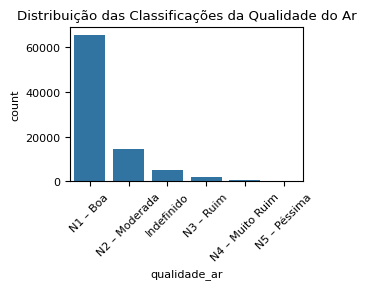

In [ ]:
# Plotar a distribuição das classificações com tamanho ajustado

# Parâmetros configuráveis
altura = 2
largura = 3

plt.figure(figsize=(largura, altura))
plt.rc('font', size=8)
sns.countplot(x='qualidade_ar', data=df, order=df['qualidade_ar'].value_counts().index)
plt.title('Distribuição das Classificações da Qualidade do Ar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Análise Temporal

In [ ]:
# Criar uma coluna "Ano" a partir da coluna "Data"
df['Ano'] = pd.to_datetime(df['Data']).dt.year

In [ ]:
# Filtrar os dados para excluir o ano de 2024 (Dados até abr)
df_data_filtrada = df[df['Ano'] != 2024]

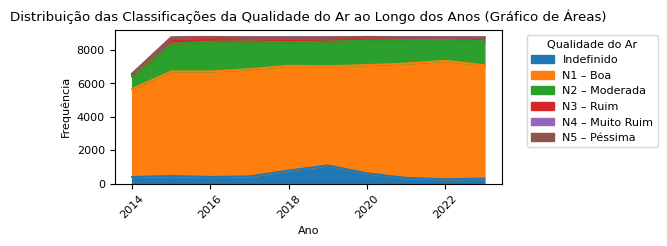

In [ ]:
# Plotar a distribuição das classificações ao longo dos anos

# Contagem das classificações da qualidade do ar por ano
qualidade_por_ano = df_data_filtrada.groupby(['Ano', 'qualidade_ar']).size().unstack(fill_value=0)

# Plotar o gráfico de áreas
qualidade_por_ano.plot(kind='area', stacked=True, figsize=(5, 2))

plt.rc('font', size=8)
plt.title('Distribuição das Classificações da Qualidade do Ar ao Longo dos Anos (Gráfico de Áreas)')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.legend(title='Qualidade do Ar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Função para Simplificar as Categorias

def simplificar_qualidade(row):
    if row['qualidade_ar'] in ['N1 – Boa', 'N2 – Moderada']:
        return 'Boa/Moderada'
    elif row['qualidade_ar'] in ['N3 – Ruim', 'N4 – Muito Ruim', 'N5 – Péssima']:
        return 'Ruim/Péssima'
    else:
        return row['qualidade_ar']

# Aplicando a função à df_data_filtrada
df_simplificada = df_data_filtrada.copy()
df_simplificada['qualidade_ar_simplificada'] = df_simplificada.apply(simplificar_qualidade, axis=1)

In [ ]:
categorias = df_simplificada['qualidade_ar_simplificada'].unique()
categorias

array(['Boa/Moderada', 'Indefinido', 'Ruim/Péssima'], dtype=object)

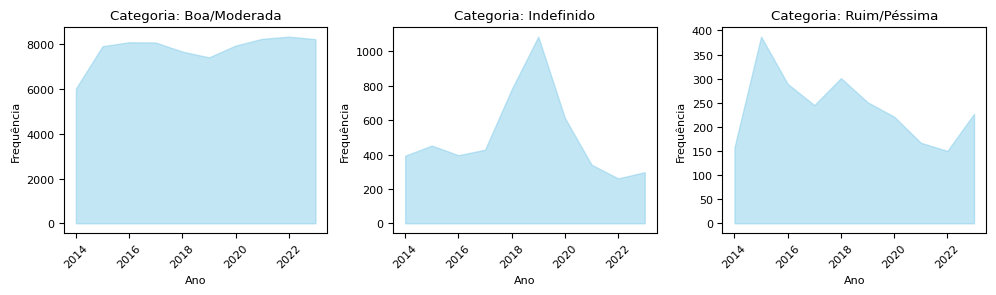

In [ ]:
# Número de categorias simplificadas
categorias = df_simplificada['qualidade_ar_simplificada'].unique()

# Configurar subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorias), figsize=(10, 3))

for i, categoria in enumerate(categorias):
    # Filtrando os dados pela categoria simplificada
    df_categoria = df_simplificada[df_simplificada['qualidade_ar_simplificada'] == categoria]

    # Contagem de ocorrências por ano
    dados_por_ano = df_categoria['Ano'].value_counts().sort_index()

    # Gráfico de área para cada categoria
    axes[i].fill_between(dados_por_ano.index, dados_por_ano.values, color='skyblue', alpha=0.5)
    axes[i].set_title(f'Categoria: {categoria}')
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Frequência')
    axes[i].tick_params(axis='x', rotation=45)

# Ajuste da posição dos gráficos para evitar sobreposição
plt.tight_layout()
plt.show()


In [ ]:
# Análise de Associação com as Variáveis de Composição e a Classificação

In [33]:
# Correlação entre as variáveis de composição e a classificação
df['qualidade_ar_encoded'] = df['qualidade_ar'].map({
    'N1 – Boa': 1,
    'N2 – Moderada': 2,
    'N3 – Ruim': 3,
    'N4 – Muito Ruim': 4,
    'N5 – Péssima': 5
})

correlation_matrix = df[['qualidade_ar_encoded', 'MP2.5', 'NO2', 'O3', 'CO']].corr()
correlation_matrix

,qualidade_ar_encoded,MP2.5,NO2,O3,CO
qualidade_ar_encoded,1.000000,0.700203,0.272419,0.355937,0.330375
MP2.5,0.700203,1.000000,0.396125,0.080741,0.434591
NO2,0.272419,0.396125,1.000000,-0.244871,0.689738
O3,0.355937,0.080741,-0.244871,1.000000,-0.268734
CO,0.330375,0.434591,0.689738,-0.268734,1.000000


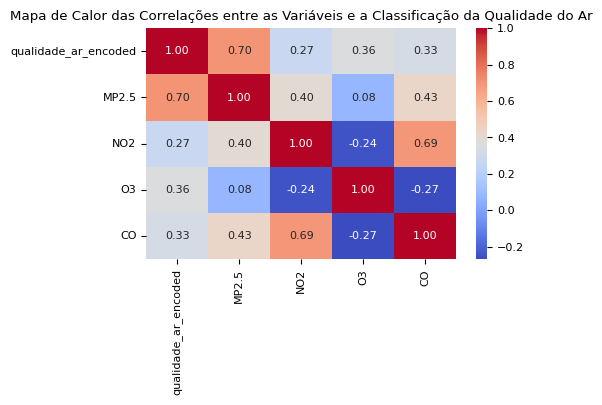

In [35]:
# Criando o mapa de calor das correlações
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações entre as Variáveis e a Classificação da Qualidade do Ar')
plt.show()

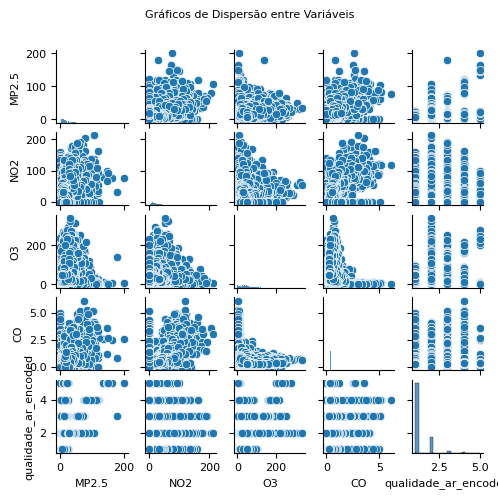

In [42]:
# Selecionar as variáveis de interesse para o gráfico de dispersão
variaveis = ['MP2.5', 'NO2', 'O3', 'CO', 'qualidade_ar_encoded']

# Criar uma matriz de gráficos de dispersão
sns.pairplot(df[variaveis], height=1.0)

# Ajustar layout para melhorar a visualização
plt.subplots_adjust(top=0.90)
plt.suptitle('Gráficos de Dispersão entre Variáveis', size=8)
plt.show()

MP2.5:

*   Existe uma relação negativa com o qualidade_ar. À medida que os níveis de MP2.5 aumentam, a qualidade do ar tende a piorar.
*   Há uma correlação moderada com NO2 e O3, indicando que esses poluentes podem frequentemente estar presentes em altas concentrações simultaneamente.

NO2:
*   Também mostra uma relação negativa com a qualidade_ar. Concentrações mais altas de NO2 estão associadas a uma pior qualidade do ar.
*   Existe uma forte correlação com O3, indicando que essas duas variáveis podem estar relacionadas em processos de poluição do ar.

O3:
*   A relação com qualidade_ar é menos clara, mas ainda assim mostra que níveis mais altos de O3 podem coincidir com pior qualidade do ar.
*   O3 apresenta correlações significativas com NO2 e, em menor grau, com MP2.5.

CO:
*   A relação de CO com a qualidade do ar é mais dispersa, mas há uma tendência de que altas concentrações de CO se correlacionem com uma pior classificação do ar.
*   CO não parece ter uma correlação forte com MP2.5 ou O3, mas tem uma leve correlação com NO2.
















# Análise de Regressão Linear Múltipla:

Modela a relação entre uma variável dependente (qualidade do ar) com as variáveis independentes (os poluentes). Vamos calcular o impacto de cada variável independente na variável dependente, e também a prever a variável dependente com base nos valores das independentes

In [46]:
df.head(1)

,Data,Hora,MP2.5,NO,NO2,NOx,O3,PRESS,RADG,RADUV,TEMP,UR,VV,CO,DV,DVG,Ano,qualidade_ar,qualidade_ar_encoded
0,2014-04-02,01:00:00,0,0,0,NaN,36.0,926.4,0.0,0.0,20.9,89.0,NaN,0.6,0,0,2014,N1 – Boa,1.0


In [84]:
# Separação da variável dependente (qualidade_ar_encoded) das variáveis independentes (os poluentes).

X = df[['MP2.5', 'NO2', 'O3', 'CO']]
y = df['qualidade_ar_encoded']

len(X), len(y)

(87696, 87696)

In [87]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(61387, 26309, 61387, 26309)

In [88]:
# Adicionar uma constante ao modelo:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

len(X_train_const), len(X_test_const)

(61387, 26309)

In [89]:
# Removendo valores vazios nas bases
X_train_const = X_train_const.dropna()
y_train = y_train.dropna()

# Alinhamento dos indices
X_train_const = X_train_const.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_train = y_train.loc[X_train_const.index]

len(X_train_const), len(y_train)

(57397, 57397)

In [90]:
# Treinar o modelo de regressão
model = sm.OLS(y_train, X_train_const).fit()

In [91]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     qualidade_ar_encoded   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     1.822
Date:                  Sat, 31 Aug 2024   Prob (F-statistic):              0.121
Time:                          20:41:41   Log-Likelihood:                -44377.
No. Observations:                 57397   AIC:                         8.876e+04
Df Residuals:                     57392   BIC:                         8.881e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2356      0.005



*   coef: Mostra os coeficientes de regressão para cada variável. Esses coeficientes representam a mudança na qualidade do ar associada a uma unidade de aumento em cada poluente, mantendo os outros constantes.
*   P>|t|: O valor p indica se a relação entre a variável independente e a variável dependente é estatisticamente significativa.
*   R-squared: Representa a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.
---
Resultado: Os coeficientes mostram que, conforme os poluentes aumentam, a qualidade do ar tende a aumentar ligeiramente, mas os valores p altos indicam que essas relações não são estatisticamente significativas.










In [94]:
# Prever os valores com o modelo treinado
y_pred = model.predict(X_test_const)

26309

In [97]:
len(y_test) , len(y_pred)

(26309, 26309)

In [98]:
# Removendo valores vazios nas bases
y_pred = y_pred.dropna()
y_test = y_test.dropna()

# Alinhamento dos indices
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_test = y_test.loc[y_pred.index]

len(y_test), len(y_pred)

(24615, 24615)

In [99]:
# Avaliar a performance do modelo

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 0.5186499025805865
R-squared: -0.0001779370499979116


Interpretação dos resultados:
*   RMSE: Quanto menor o valor, melhor o modelo está prevendo a qualidade do ar.
*   R-squared: Varia de 0 a 1. Um valor próximo de 1 indica que o modelo explica bem as variações nos dados.

O resultado do modelo deu muito ruim rs
Precisamos avaliar os pontos: Dados Ausentes ou Infinitos, Escalagem e Normalização, Modelos Alternativos


